In [55]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)

In [56]:
df = pd.read_csv("train.csv")
df.columns

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
       'floor_number', 'facing', 'floor_type', 'gate_community', 'corner_pro',
       'parking', 'wheelchairadption', 'petfacility', 'aggDur', 'noticeDur',
       'lightbill', 'powerbackup', 'propertyage', 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room', 'maintenance_amt',
       'brok_amt', 'deposit_amt', 'mnt_amt', 'rent'],
      dtype='object')

In [57]:
df = df[['bedroom','bathrooms','area','furnishing','avalable_for','rent']]

In [58]:
df.head()

,bedroom,bathrooms,area,furnishing,avalable_for,rent
0,2,2,1050.0,Unfurnished,All,20000.0
1,2,2,760.0,Unfurnished,All,14000.0
2,3,3,0.0,Semifurnished,All,22999.0
3,1,1,628.0,Furnished,Family Only,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",7500.0


In [59]:
df = df.rename({"bedroom": "bedrooms"}, axis=1)
df = df.rename({"avalable_for": "available_for"}, axis=1)
df.size

65304

In [60]:
df = df.dropna()
df.isnull().sum()

bedrooms         0
bathrooms        0
area             0
furnishing       0
available_for    0
rent             0
dtype: int64

In [61]:
median = df.area[df.area != 0].median()  # Calculate the median of non-zero values
df.area = df.area.replace(0, median) 

In [62]:
df = df[df['furnishing'] != 'Unfurnishe']

In [63]:
df["available_for"].unique()

array(['All', 'Family Only', 'Family , Bachelors (Men Only)',
       'Family , Bachelors (Women Only)', 'Bachelors (Men/Women)',
       'Bachelors (Women Only)', 'Bachelors (Men Only)'], dtype=object)

In [64]:
def clean(x):
    if 'Family ' in x:
        return 'Family'
    if 'Bachelors' in x:
        return 'Bachelors'
    return x

df['available_for'] = df['available_for'].apply(clean)

In [65]:
df["available_for"].unique()

array(['All', 'Family', 'Bachelors'], dtype=object)

In [66]:
df["bedrooms"].unique()

array([ 2,  3,  1,  4, 22, 10,  5,  7,  6, 20])

In [67]:
df = df[df["bedrooms"] <= 9]

In [68]:
df["bedrooms"].unique()

array([2, 3, 1, 4, 5, 7, 6])

In [69]:
df["bathrooms"].unique()

array([2, 3, 1, 4, 5, 6, 7])

In [70]:
df

,bedrooms,bathrooms,area,furnishing,available_for,rent
0,2,2,1050.0,Unfurnished,All,20000.0
1,2,2,760.0,Unfurnished,All,14000.0
2,3,3,750.0,Semifurnished,All,22999.0
3,1,1,628.0,Furnished,Family,13000.0
4,2,2,668.0,Semifurnished,Family,7500.0
...,...,...,...,...,...,...
10879,2,1,750.0,Unfurnished,Family,15000.0
10880,2,1,750.0,Unfurnished,All,11000.0
10881,3,4,2390.0,Unfurnished,Family,55000.0
10882,2,2,563.0,Semifurnished,Family,14000.0


In [71]:
df['price_per_sqft'] = df['rent']/df['area']

In [72]:
df

,bedrooms,bathrooms,area,furnishing,available_for,rent,price_per_sqft
0,2,2,1050.0,Unfurnished,All,20000.0,19.047619
1,2,2,760.0,Unfurnished,All,14000.0,18.421053
2,3,3,750.0,Semifurnished,All,22999.0,30.665333
3,1,1,628.0,Furnished,Family,13000.0,20.700637
4,2,2,668.0,Semifurnished,Family,7500.0,11.227545
...,...,...,...,...,...,...,...
10879,2,1,750.0,Unfurnished,Family,15000.0,20.000000
10880,2,1,750.0,Unfurnished,All,11000.0,14.666667
10881,3,4,2390.0,Unfurnished,Family,55000.0,23.012552
10882,2,2,563.0,Semifurnished,Family,14000.0,24.866785


In [73]:
df.shape

(10847, 7)

In [74]:
df = df[~(df.area/df.bedrooms<300)]

In [75]:
df.shape

(9855, 7)

In [76]:
df.price_per_sqft.describe()

count      9855.000000
mean         37.114364
std        1657.968462
min           0.178633
25%          15.333333
50%          20.000000
75%          24.691358
max      164609.052000
Name: price_per_sqft, dtype: float64

In [77]:
df = df[~(df.price_per_sqft<10)]
df = df[~(df.price_per_sqft>70)]
df.price_per_sqft.describe()

count    9216.000000
mean       21.265959
std         7.021129
min        10.000000
25%        16.159674
50%        20.000000
75%        25.000000
max        66.666667
Name: price_per_sqft, dtype: float64

In [78]:
df

,bedrooms,bathrooms,area,furnishing,available_for,rent,price_per_sqft
0,2,2,1050.0,Unfurnished,All,20000.0,19.047619
1,2,2,760.0,Unfurnished,All,14000.0,18.421053
3,1,1,628.0,Furnished,Family,13000.0,20.700637
4,2,2,668.0,Semifurnished,Family,7500.0,11.227545
5,2,2,950.0,Semifurnished,Family,17000.0,17.894737
...,...,...,...,...,...,...,...
10878,2,1,900.0,Unfurnished,Family,15000.0,16.666667
10879,2,1,750.0,Unfurnished,Family,15000.0,20.000000
10880,2,1,750.0,Unfurnished,All,11000.0,14.666667
10881,3,4,2390.0,Unfurnished,Family,55000.0,23.012552


In [79]:
from sklearn.preprocessing import LabelEncoder
le_furnishing = LabelEncoder()
df['furnishing'] = le_furnishing.fit_transform(df['furnishing'])
df["furnishing"].unique()

array([2, 0, 1])

In [80]:
df

,bedrooms,bathrooms,area,furnishing,available_for,rent,price_per_sqft
0,2,2,1050.0,2,All,20000.0,19.047619
1,2,2,760.0,2,All,14000.0,18.421053
3,1,1,628.0,0,Family,13000.0,20.700637
4,2,2,668.0,1,Family,7500.0,11.227545
5,2,2,950.0,1,Family,17000.0,17.894737
...,...,...,...,...,...,...,...
10878,2,1,900.0,2,Family,15000.0,16.666667
10879,2,1,750.0,2,Family,15000.0,20.000000
10880,2,1,750.0,2,All,11000.0,14.666667
10881,3,4,2390.0,2,Family,55000.0,23.012552


In [81]:
from sklearn.preprocessing import LabelEncoder
le_available_for = LabelEncoder()
df['available_for'] = le_available_for.fit_transform(df['available_for'])
df["available_for"].unique()

array([0, 2, 1])

In [82]:
df = df.drop('price_per_sqft',axis='columns')

In [83]:
df

,bedrooms,bathrooms,area,furnishing,available_for,rent
0,2,2,1050.0,2,0,20000.0
1,2,2,760.0,2,0,14000.0
3,1,1,628.0,0,2,13000.0
4,2,2,668.0,1,2,7500.0
5,2,2,950.0,1,2,17000.0
...,...,...,...,...,...,...
10878,2,1,900.0,2,2,15000.0
10879,2,1,750.0,2,2,15000.0
10880,2,1,750.0,2,0,11000.0
10881,3,4,2390.0,2,2,55000.0


In [84]:
x = df.drop('rent', axis=1)
x.head()

,bedrooms,bathrooms,area,furnishing,available_for
0,2,2,1050.0,2,0
1,2,2,760.0,2,0
3,1,1,628.0,0,2
4,2,2,668.0,1,2
5,2,2,950.0,1,2


In [85]:
y = df.rent
y.head()

0    20000.0
1    14000.0
3    13000.0
4     7500.0
5    17000.0
Name: rent, dtype: float64

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    r2 = r2_score(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    results[name] = {"R-squared": r2, "RMSE": rmse}

# Sort results by R-squared in descending order
sorted_results = sorted(results.items(), key=lambda item: item[1]["R-squared"], reverse=True)

# Print results as a table
print("Model Evaluation (Sorted by R-squared):")
print("-" * 52)
print("{:<30} | {:<10} | {:<10}".format("Model", "R-squared", "RMSE"))
print("-" * 52)
for name, scores in sorted_results:
    print("{:<30} | {:<10.4f} | {:<10.4f}".format(name, scores["R-squared"], scores["RMSE"]))
print("-" * 52)

Model Evaluation (Sorted by R-squared):
----------------------------------------------------
Model                          | R-squared  | RMSE      
----------------------------------------------------
Gradient Boosting Regressor    | 0.6744     | 5041.3922 
Lasso Regression               | 0.6542     | 5196.0668 
Ridge Regression               | 0.6542     | 5196.0869 
Linear Regression              | 0.6542     | 5196.0891 
Random Forest Regressor        | 0.6509     | 5220.3312 
ElasticNet Regression          | 0.6252     | 5408.9777 
K-Nearest Neighbors Regressor  | 0.6012     | 5579.5183 
Decision Tree Regressor        | 0.5788     | 5734.5573 
AdaBoost Regressor             | 0.5785     | 5736.0661 
SVR                            | 0.0232     | 8732.3122 
----------------------------------------------------


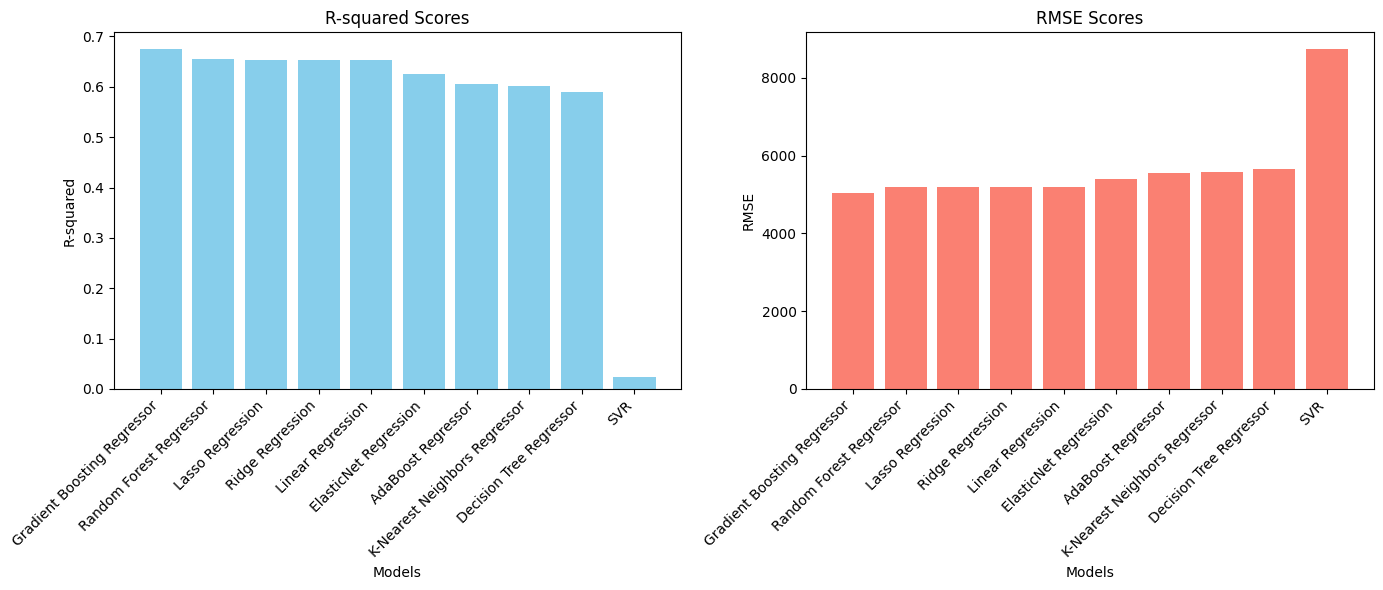

In [87]:
# Plotting R-squared and RMSE side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(df_results.index, df_results['R-squared'], color='skyblue')
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("R-squared Scores")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(df_results.index, df_results['RMSE'], color='salmon')
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE Scores")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Gradient Boosting Regressor:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
R-squared: 0.6820
RMSE: 4982.5889


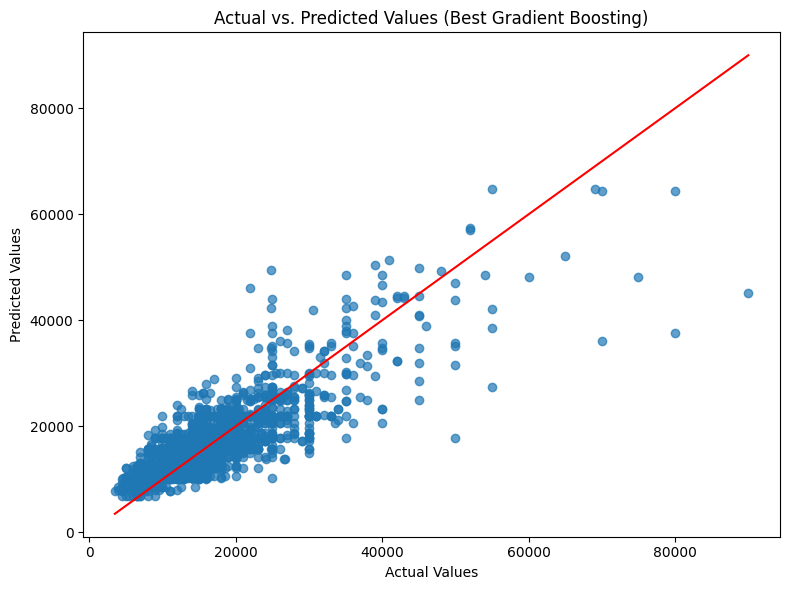

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle  # For saving the model

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Get the best model
best_gbr = grid_search.best_estimator_

# Evaluate the best model
ypred = best_gbr.predict(xtest)
r2 = r2_score(ytest, ypred)
rmse = np.sqrt(mean_squared_error(ytest, ypred))

print("Best Gradient Boosting Regressor:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Visualize the predictions of the best model
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, alpha=0.7)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Best Gradient Boosting)")
plt.tight_layout()
plt.show()







In [89]:
x.columns

Index(['bedrooms', 'bathrooms', 'area', 'furnishing', 'available_for'], dtype='object')

In [90]:
best_gbr.predict([[2,2,1000,2,0]])

C:\Users\Vedant\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([19693.61113852])

In [91]:
import pickle
data = {"model": best_gbr, "le_furnishing": le_furnishing, "le_available_for": le_available_for}
with open('Model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [92]:
with open('Model.pkl', 'rb') as file:
    data = pickle.load(file)

forest_loaded = data["model"]
le_furnishing = data["le_furnishing"]
le_available_for = data["le_available_for"]